# Tutorial

Tutorial on how to use the Imbalance Quantification (Imbaqu) library.

## Downloading and installing
Download the package from GitHub, nativate to the `setup.py` and install it using pip.

In [ ]:
!pip install .

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

## Create Dataset
This dataset is just created for demonstated purposes. Substitute it by your own data.

In [2]:
# create dataset with two continuous and one categorical variable.
numerical_data = pd.DataFrame(data = np.random.normal(size = (1000,2)), columns = ['num1', 'num2'])
categorical_data = pd.DataFrame(data = np.random.choice([1,2], size=1000), columns= ['cat1'])
categorical_data = categorical_data.astype('category')
data = pd.concat([numerical_data, categorical_data], axis = 1)
data

,num1,num2,cat1
0,1.624345,-0.611756,2
1,-0.528172,-1.072969,2
2,0.865408,-2.301539,1
3,1.744812,-0.761207,1
4,0.319039,-0.249370,1
...,...,...,...
995,-0.430770,0.944285,2
996,-0.472876,-1.407064,1
997,-0.447473,0.188583,2
998,0.560918,-0.921659,1


In [3]:
from imbami import DensityDistanceRelevance, DensityRatioRelevance, crbSMOGN, cSMOGN

In [4]:
target_column = 'num1'

In [5]:
ratio_kernel = DensityRatioRelevance()
ratio_kernel.fit(data[target_column].to_numpy(),
            rel_data= None)

ratio_relevance = pd.Series(data = ratio_kernel.eval(data[target_column].to_numpy()), index= data.index)

ratio_sampler = crbSMOGN(data=data,
                    target_column=target_column,
                    relevance_values=ratio_relevance)


new_ratio_data = ratio_sampler.run_sampling(min_acceptable_relevance=1,
                    max_acceptable_relevance=1,
                    num_bins=10,
                    allowed_bin_deviation=1,
                    noise_factor=0.01,
                    ignore_categorical_similarity=False,
                    enable_undersampling=True)

In [6]:
dist_kernel = DensityDistanceRelevance()
dist_kernel.fit(data[target_column].to_numpy(),
            emp_bandwidth_type='silverman',
            rel_data= None,
            rel_bandwidth_type= 'uniform',
            rel_bandwidth_factor= 1)

dist_relevance = pd.Series(data = dist_kernel.eval(data[target_column].to_numpy(), centered= True), index= data.index)

dist_sampler = cSMOGN(data=data,
                target_column=target_column,
                relevance_values=dist_relevance)

new_dist_data = dist_sampler.run_sampling(num_bins=10,
                    allowed_bin_deviation=1,
                    noise_factor=0.01,
                    ignore_categorical_similarity=False,
                    oversample_rate = 0.5,
                    undersample_rate = 0.5,
                    enable_undersampling = True)


<Axes: >

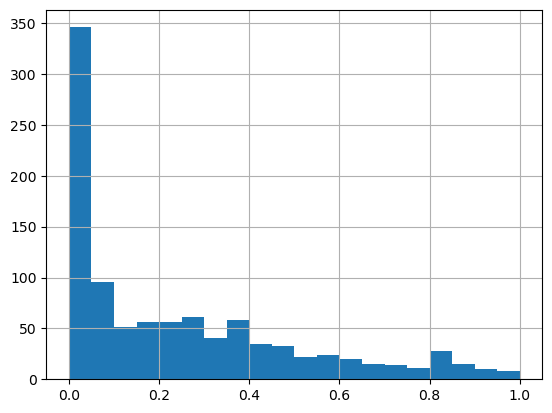

In [7]:
dist_relevance.hist(bins=20)

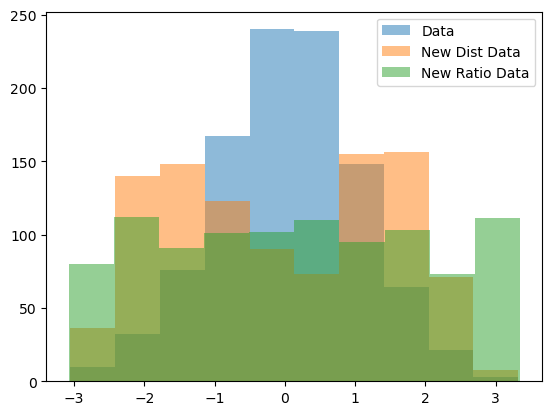

In [8]:
plt.hist(data['num1'], alpha = 0.5, label= 'Data')
plt.hist(new_dist_data['num1'], alpha = 0.5, label= 'New Dist Data')
plt.hist(new_ratio_data['num1'], alpha =0.5, label= 'New Ratio Data')
plt.legend()
plt.show()